# Projet

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('heart_2020_cleaned.csv')

## Exploration

In [82]:
df.shape

(319795, 18)

In [83]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

On peut observer les valeurs continues

In [84]:
dfNumber = df.select_dtypes('float64')
dfNumber.head(2)


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0


Et les valeurs discrètes 

In [85]:
dfObject = df.select_dtypes('object')
dfObject.head(2)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No


Quantité de valeus nulles => Le fichier ne contient aucune valeur nulle 

In [86]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [87]:
one_hot_sex = pd.get_dummies(df['Sex'])
df = df.drop('Sex',axis = 1)
df = df.join(one_hot_sex)
  
one_hot_ageCategory = pd.get_dummies(df['AgeCategory'])
df = df.drop('AgeCategory',axis = 1)
df = df.join(one_hot_ageCategory)

one_hot_race = pd.get_dummies(df['Race'])
df = df.drop('Race',axis = 1)
df = df.join(one_hot_race)

one_hot_genHealth = pd.get_dummies(df['GenHealth'])
df = df.drop('GenHealth',axis = 1)
df = df.join(one_hot_genHealth)

df = df.replace("No", 0).replace("Yes", 1)

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,Asian,Black,Hispanic,Other,White,Excellent,Fair,Good,Poor,Very good
0,0,16.60,1,0,0,3.0,30.0,0,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
319792,0,24.24,0,0,0,0.0,0.0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


si les données sont corrélées entre elles, si à l’aide
d’une représentation graphique de vos données vous pouvez déjà tirer des théories sur les
features représentant le plus d’informations

=> Il y a 27373 personnes sur les 319795 qui souffrent de maladies cardiaques

=> Sur les 27373 personnes, 16037 d'entre elles fument, 1141 boivent de l'alcool, 890 fument et boivent

=> Sur les 27373 personnes, 15497 ont un temps de sommeil inférieur aux 8 heures recommandées

Heart Disease : 27373
And Smoking : 16037
And Drinking : 1141
And Both : 890
All Smoking and Drinking : 13415


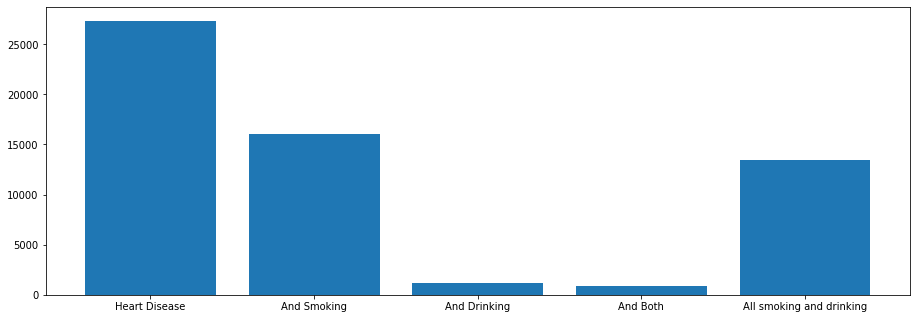

In [88]:
numberHeartDisease = len(df[df['HeartDisease'] == 1])
numberHeartDiseaseAndSmoking = len(df[(df['HeartDisease'] == 1) & (df['Smoking'] == 1)])
numberHeartDiseaseAndDrinking = len(df[(df['HeartDisease'] == 1) & (df['AlcoholDrinking'] == 1)])
numberHeartDiseaseAndSmokingAndDrinking = len(df[(df['HeartDisease'] == 1) & (df['AlcoholDrinking'] == 1) & (df['Smoking'] == 1)])
numberSmokingAndDrinking = len(df[(df['AlcoholDrinking'] == 1) & (df['Smoking'] == 1)])

print(f"Heart Disease : {numberHeartDisease}")
print(f"And Smoking : {numberHeartDiseaseAndSmoking}")
print(f"And Drinking : {numberHeartDiseaseAndDrinking}")
print(f"And Both : {numberHeartDiseaseAndSmokingAndDrinking}")
print(f"All Smoking and Drinking : {numberSmokingAndDrinking}")

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
criterias = ['Heart Disease', 'And Smoking', 'And Drinking', 'And Both', 'All smoking and drinking']
stats = [numberHeartDisease, numberHeartDiseaseAndSmoking, numberHeartDiseaseAndDrinking,numberHeartDiseaseAndSmokingAndDrinking, numberSmokingAndDrinking]
ax.bar(criterias, stats)
plt.show()

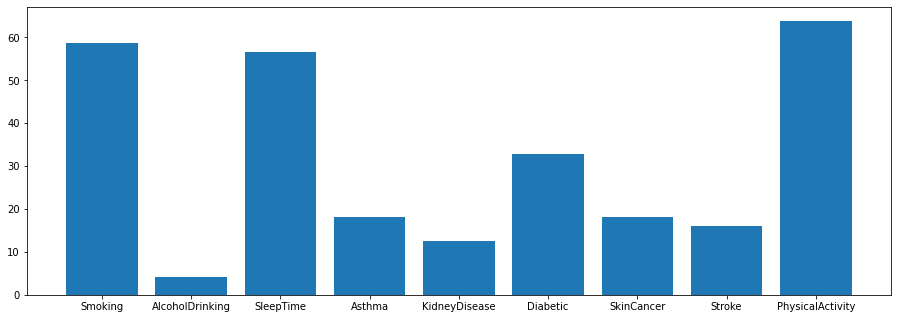

Smoking : 58.586928725386336
AlcoholDrinking : 4.168341066013955
SleepTime : 56.614181858035295
Asthma : 18.021407956745698
KidneyDisease : 12.621926716107112
Diabetic : 32.722025353450476
SkinCancer : 18.19310999890403
Stroke : 16.034048149636504
PhysicalActivity : 63.89142585759691


In [89]:
heartDiseased = df[df['HeartDisease'] == 1]
smoking = len(df[(df['HeartDisease'] == 1) & (df['Smoking'] == 1)]) / len(heartDiseased) * 100
alcool = len(df[(df['HeartDisease'] == 1) & (df['AlcoholDrinking'] == 1)]) / len(heartDiseased) * 100
sleeptime = len(df[(df['HeartDisease'] == 1) & (df['SleepTime'] < 8)]) / len(heartDiseased) * 100
asthma = len(df[(df['HeartDisease'] == 1) & (df['Asthma'] == 1)]) / len(heartDiseased) * 100
kidney = len(df[(df['HeartDisease'] == 1) & (df['KidneyDisease'] == 1)]) / len(heartDiseased) * 100
diabetic = len(df[(df['HeartDisease'] == 1) & (df['Diabetic'] == 1)]) / len(heartDiseased) * 100
skinCancer = len(df[(df['HeartDisease'] == 1) & (df['SkinCancer'] == 1)]) / len(heartDiseased) * 100
stroke = len(df[(df['HeartDisease'] == 1) & (df['Stroke'] == 1)]) / len(heartDiseased) * 100
physicalActivity = len(df[(df['HeartDisease'] == 1) & (df['PhysicalActivity'] == 1)]) / len(heartDiseased) * 100

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
criterias = ['Smoking', 'AlcoholDrinking', 'SleepTime', 'Asthma', 'KidneyDisease', 'Diabetic', 'SkinCancer', 'Stroke', 'PhysicalActivity']
stats = [smoking, alcool, sleeptime, asthma, kidney, diabetic, skinCancer, stroke, physicalActivity]
ax.bar(criterias, stats)
plt.show()

print(f"Smoking : {smoking}")
print(f"AlcoholDrinking : {alcool}")
print(f"SleepTime : {sleeptime}")
print(f"Asthma : {asthma}")
print(f"KidneyDisease : {kidney}")
print(f"Diabetic : {diabetic}")
print(f"SkinCancer : {skinCancer}")
print(f"Stroke : {stroke}")
print(f"PhysicalActivity : {physicalActivity}")

HeartDisease


C:\Users\naelm\AppData\Local\Temp\ipykernel_312\2524173173.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  current = heartDiseased.drop('HeartDisease', 1)
C:\Users\naelm\AppData\Local\Temp\ipykernel_312\2524173173.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  current = heartDiseased.drop('Diabetic', 1)


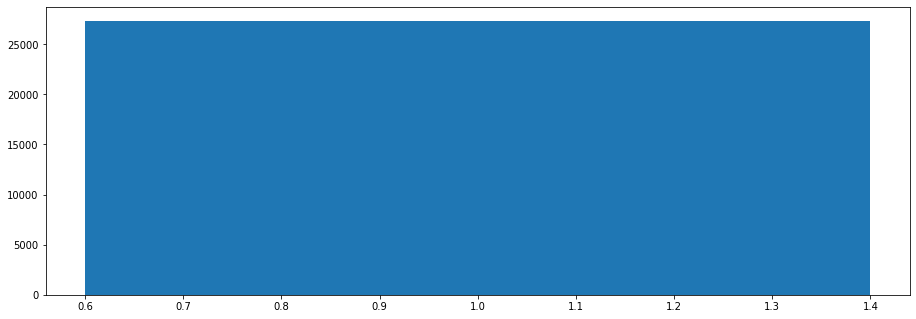

BMI


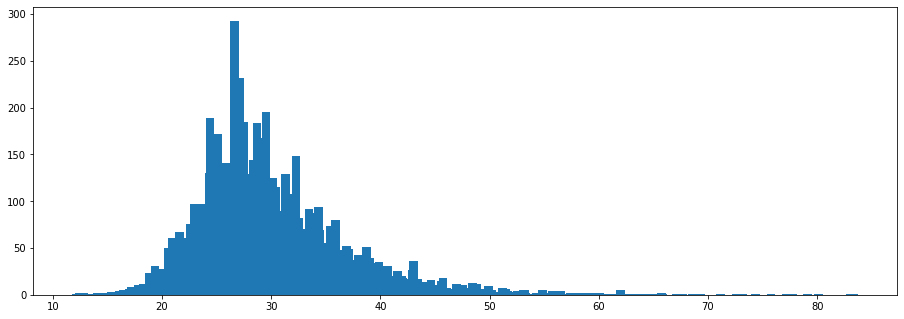

Smoking


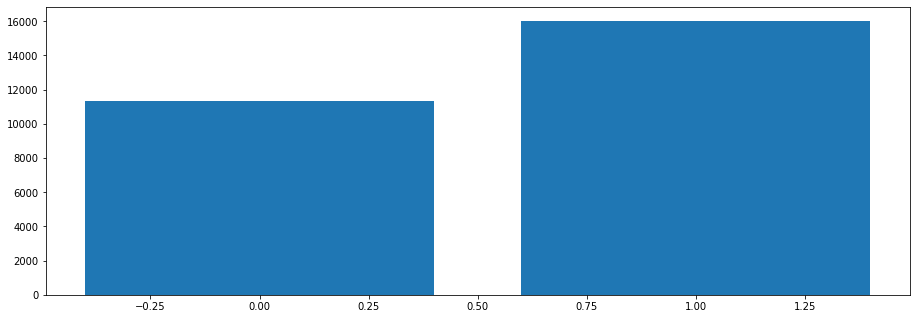

AlcoholDrinking


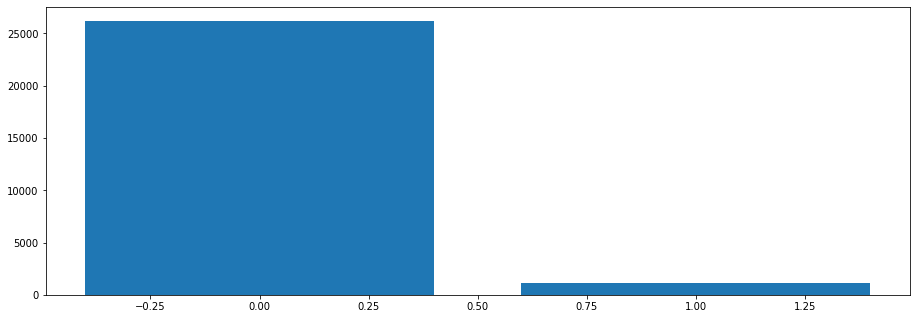

Stroke


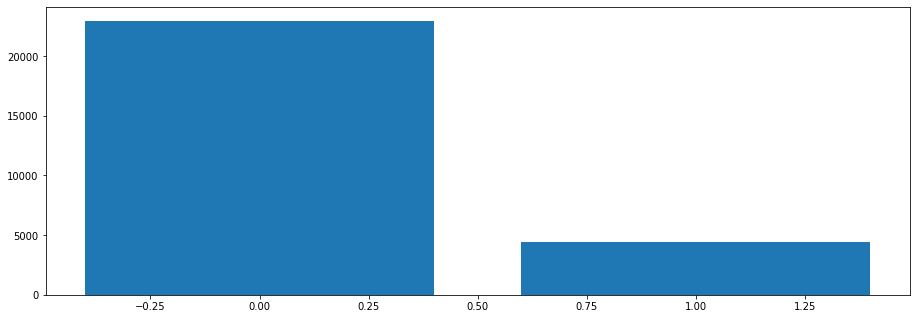

PhysicalHealth


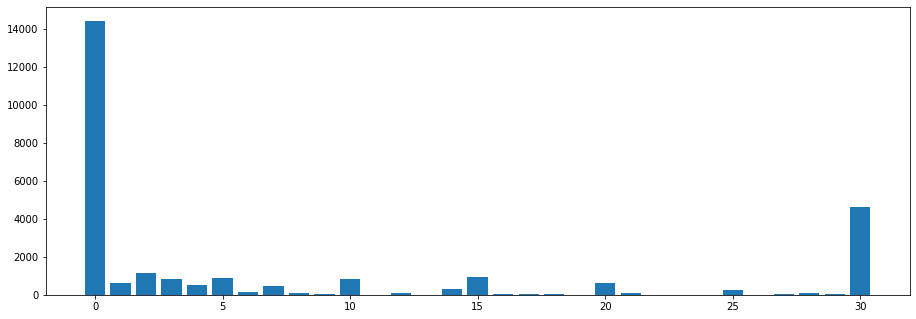

MentalHealth


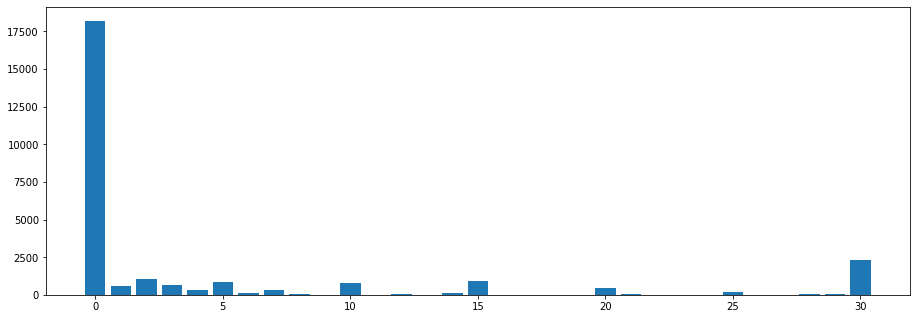

DiffWalking


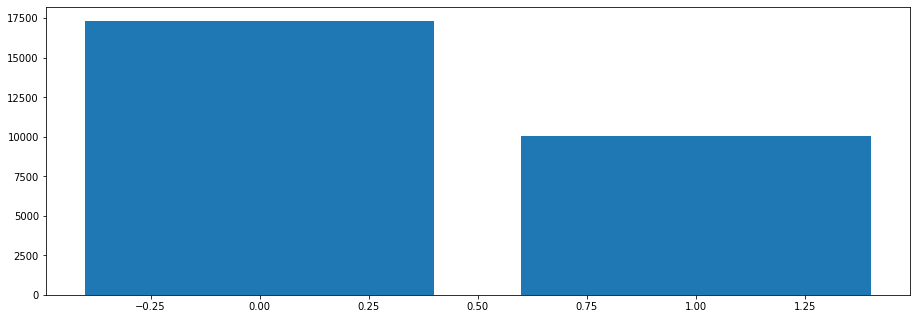

PhysicalActivity


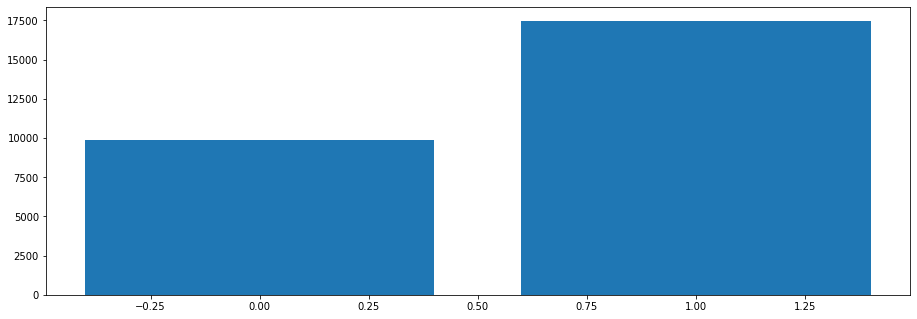

SleepTime


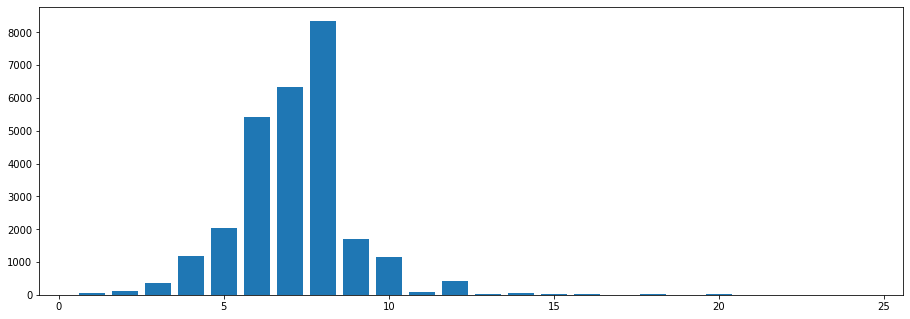

Asthma


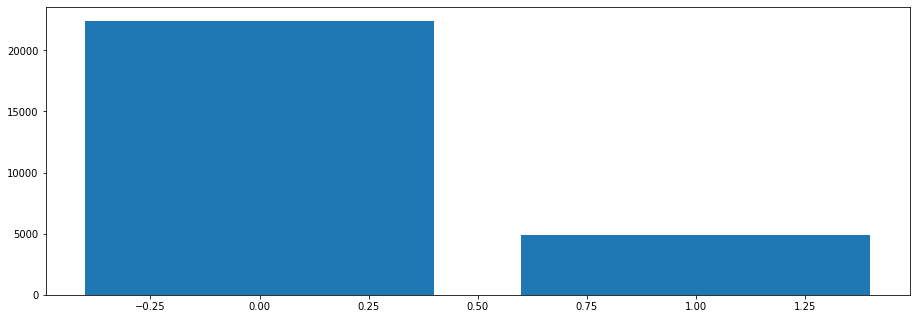

KidneyDisease


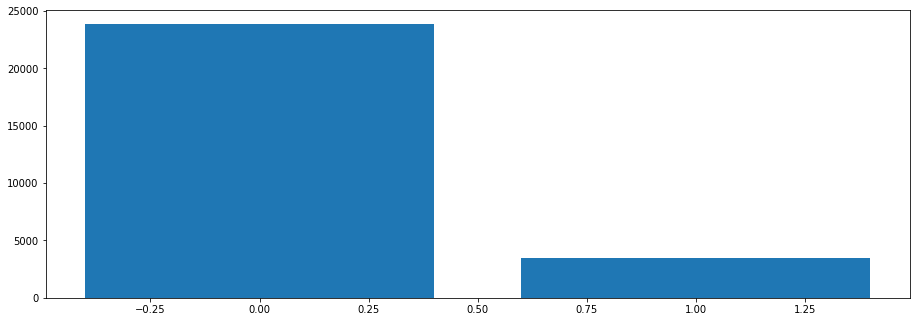

SkinCancer


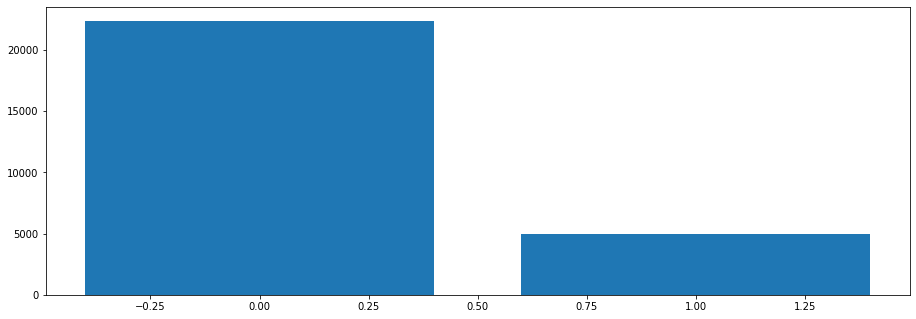

Female


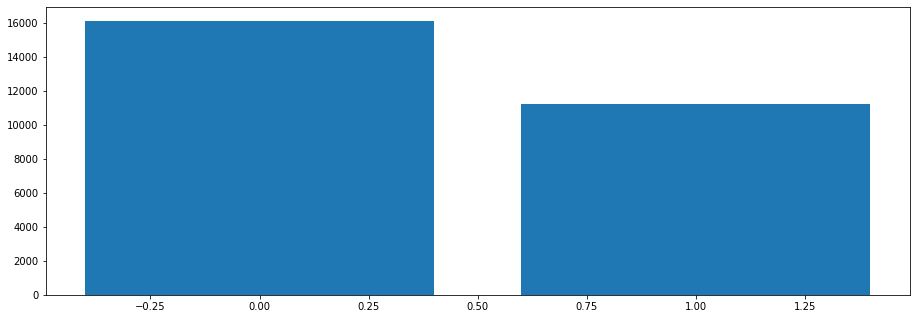

Male


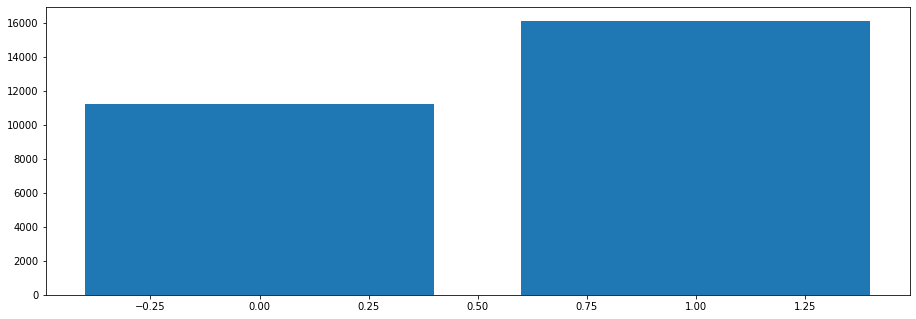

18-24


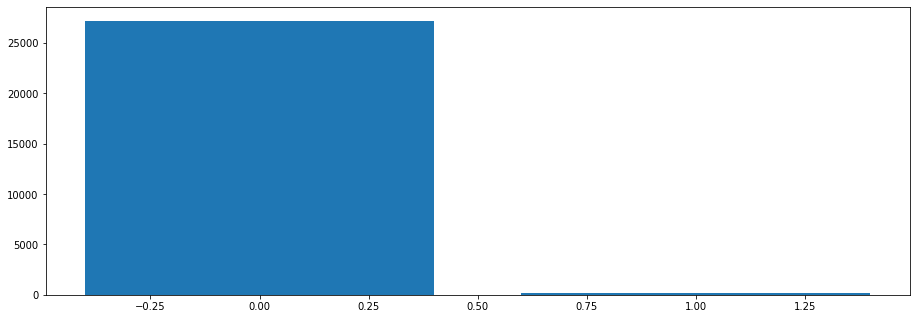

25-29


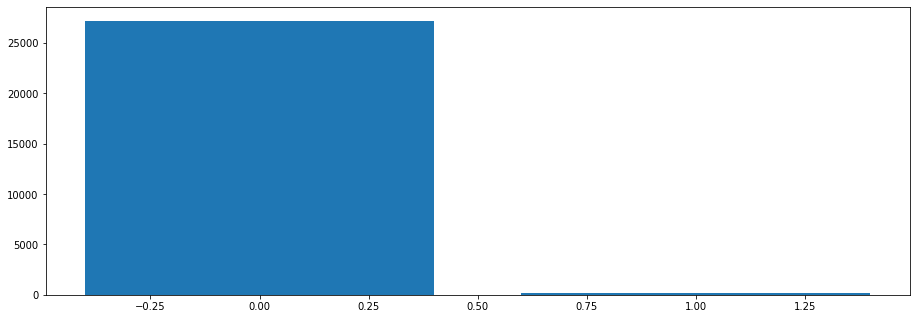

30-34


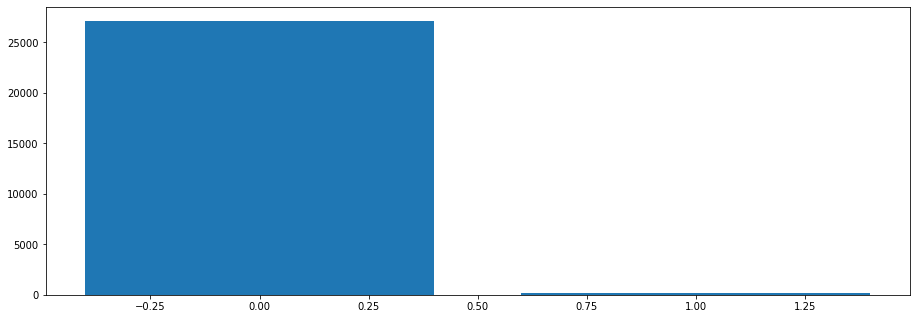

35-39


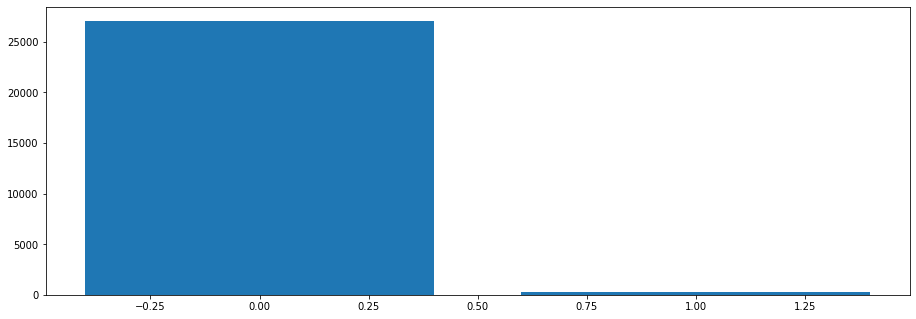

40-44


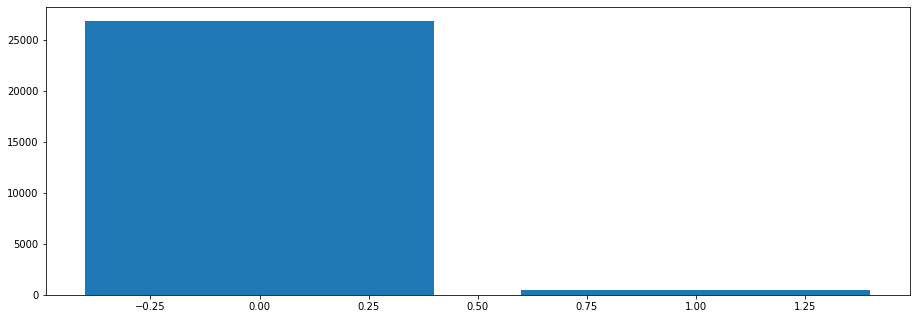

45-49


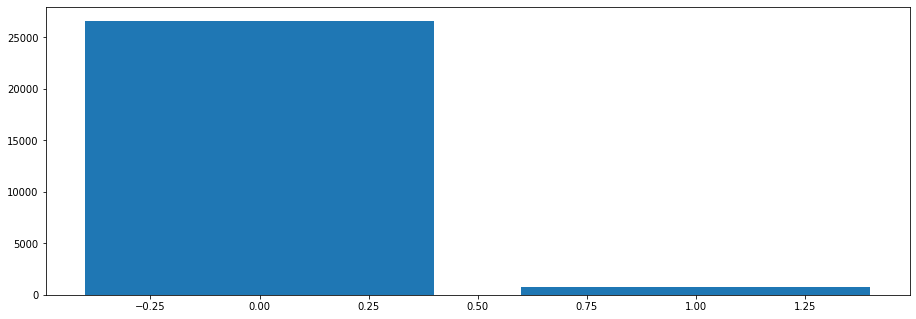

50-54


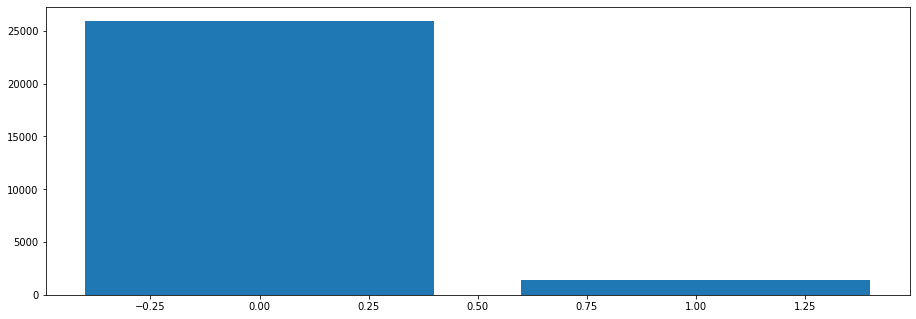

55-59


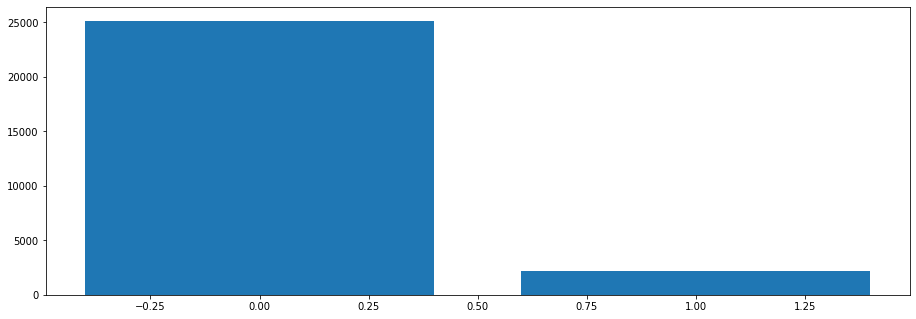

60-64


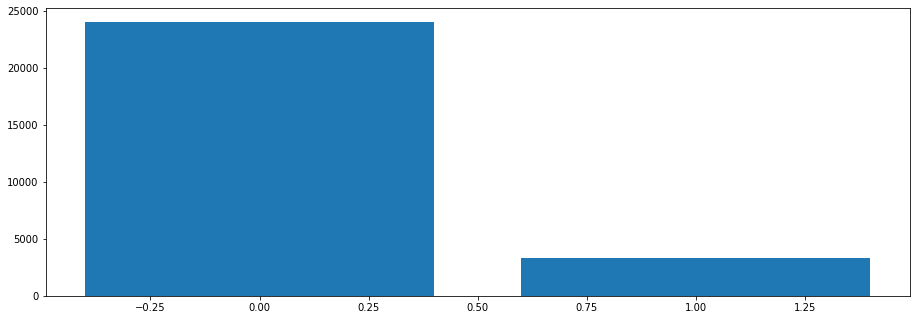

65-69


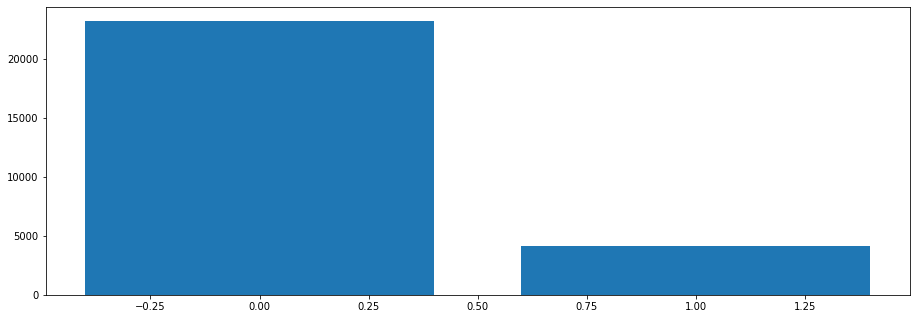

70-74


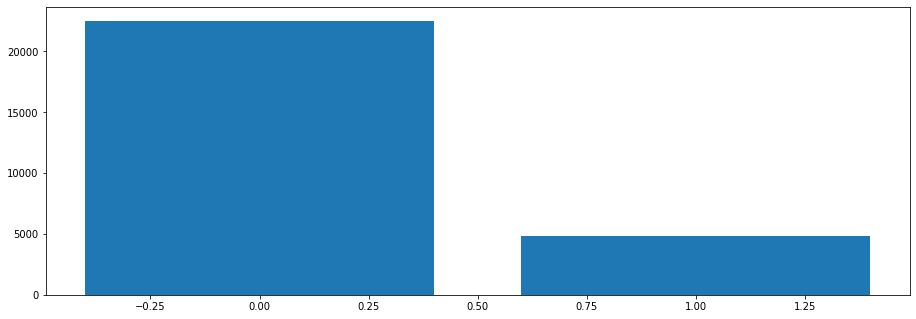

75-79


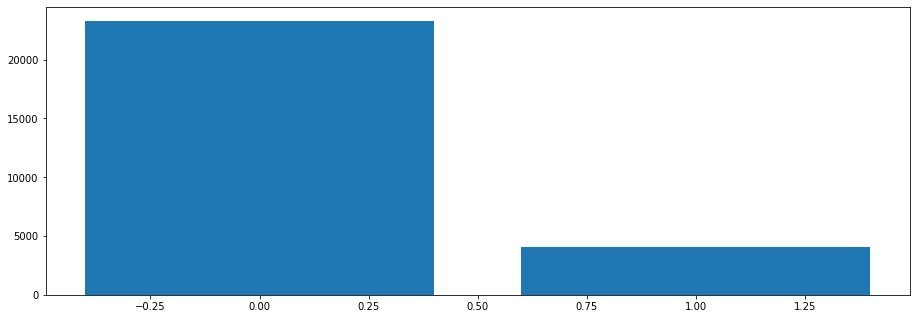

80 or older


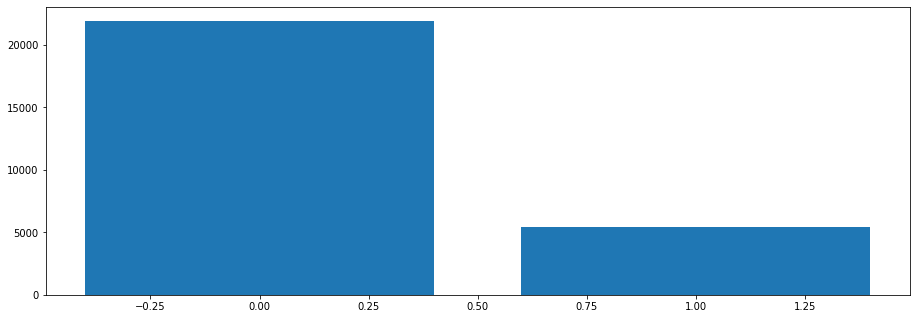

American Indian/Alaskan Native


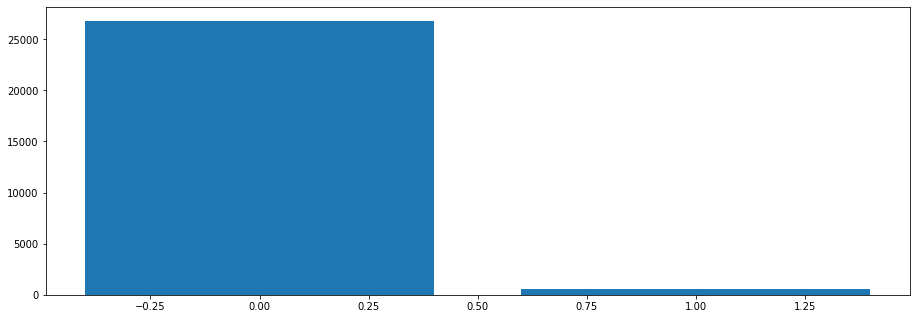

Asian


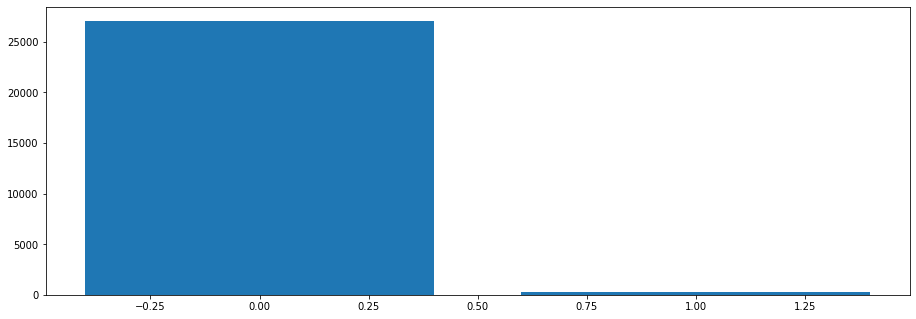

Black


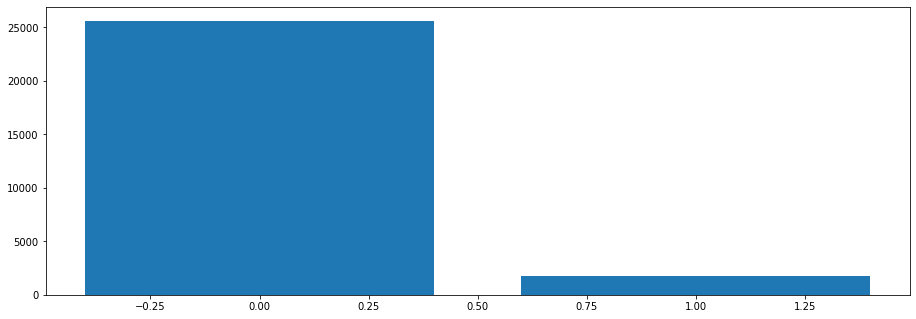

Hispanic


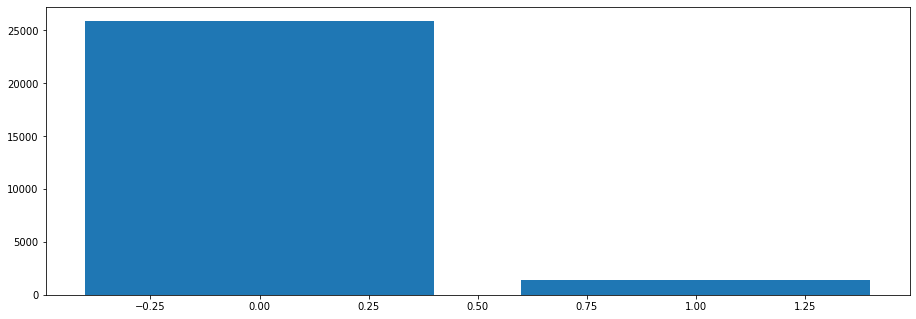

Other


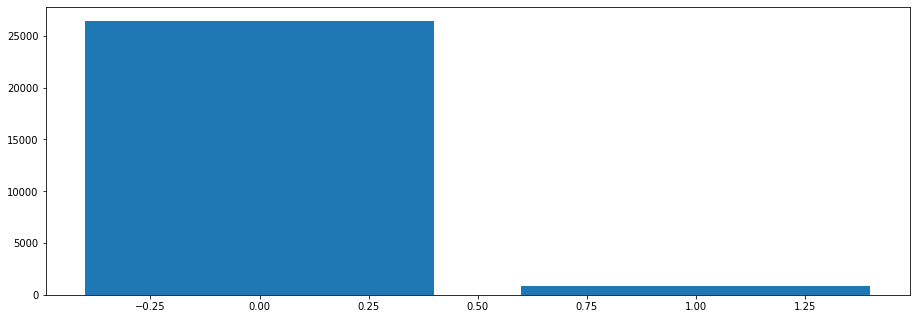

White


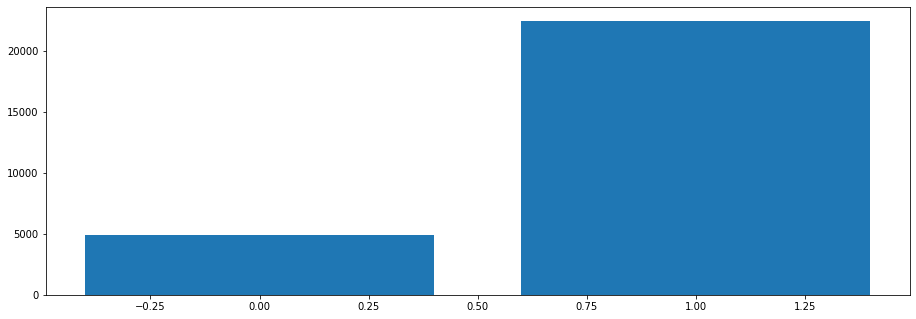

Excellent


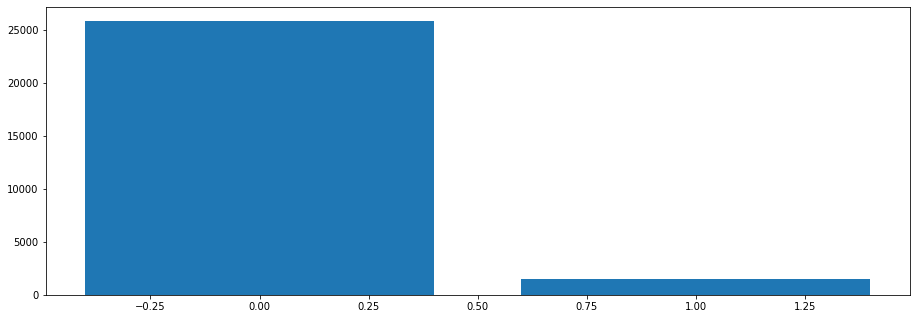

Fair


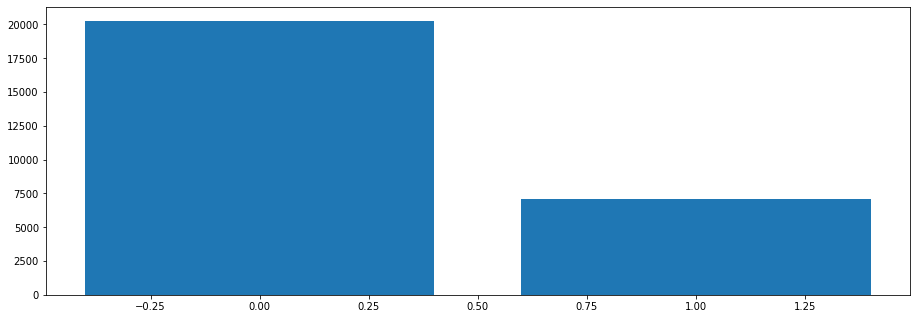

Good


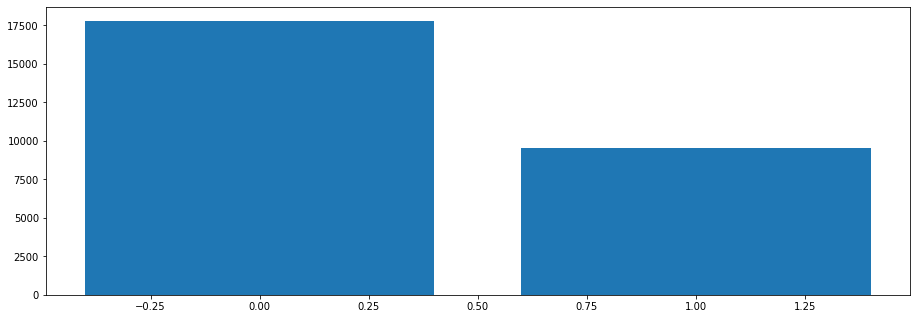

Poor


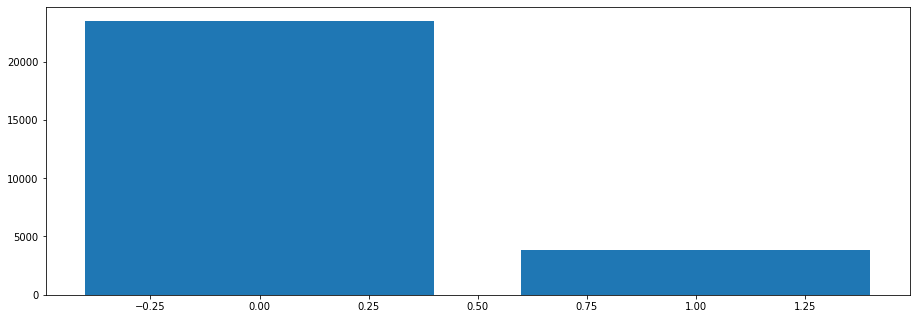

Very good


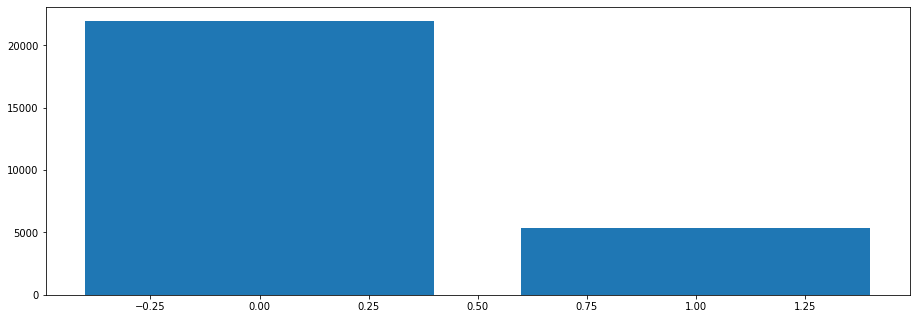

In [90]:
current = heartDiseased.drop('HeartDisease', 1)
current = heartDiseased.drop('Diabetic', 1)
for str in current.columns:
    print(str)
    values = current[str].value_counts()
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(values.index.tolist(), values.tolist())
    plt.show()


Compairason de certaines combinaisons entre la population entière et les personnes malades.

Smoking : 131908 
Heart Disease And Smoking : 16037, 12.157715983867543
Drinking : 131908
Heart Disease And Drinking : 1141, 0.8649968159626407
Stroke : 12069
Heart Disease And Stroke : 4389, 36.36589609743972
Diabetic : 40802
Heart Disease And Diabetic : 8957, 21.952355276702125
Asthma : 42872
Heart Disease And Asthma : 4933, 11.506344467251353


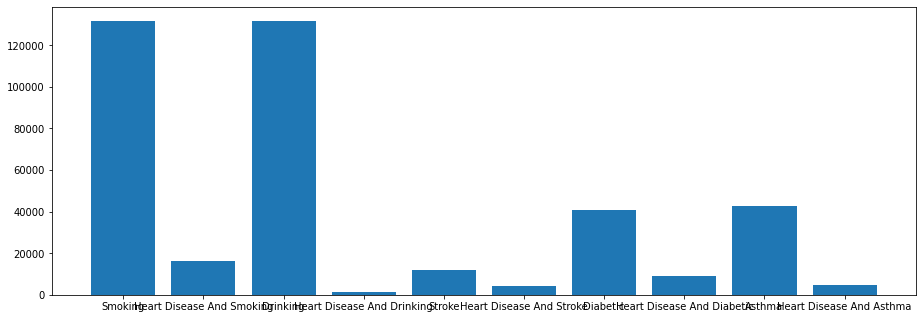

In [91]:
numberHeartDiseaseAndSmoking = len(df[(df['HeartDisease'] == 1) & (df['Smoking'] == 1)])
numberSmoking = len(df[df['Smoking'] == 1])
numberHeartDiseaseAndDrinking = len(df[(df['HeartDisease'] == 1) & (df['AlcoholDrinking'] == 1)])
numberDrinking = len(df[df['Smoking'] == 1])
numberHeartDiseaseAndStroke = len(df[(df['HeartDisease'] == 1) & (df['Stroke'] == 1)])
numberStroke = len(df[df['Stroke'] == 1])
numberHeartDiseaseAndDiabetic = len(df[(df['HeartDisease'] == 1) & (df['Diabetic'] == 1)])
numberDiabetic = len(df[df['Diabetic'] == 1])
numberHeartDiseaseAndAsthma = len(df[(df['HeartDisease'] == 1) & (df['Asthma'] == 1)])
numberAsthma = len(df[df['Asthma'] == 1])

print(f"Smoking : {numberSmoking} ")
print(f"Heart Disease And Smoking : {numberHeartDiseaseAndSmoking}, {numberHeartDiseaseAndSmoking / numberSmoking * 100}")
print(f"Drinking : {numberDrinking}")
print(f"Heart Disease And Drinking : {numberHeartDiseaseAndDrinking}, {numberHeartDiseaseAndDrinking / numberDrinking * 100}")
print(f"Stroke : {numberStroke}")
print(f"Heart Disease And Stroke : {numberHeartDiseaseAndStroke}, {numberHeartDiseaseAndStroke / numberStroke * 100}")
print(f"Diabetic : {numberDiabetic}")
print(f"Heart Disease And Diabetic : {numberHeartDiseaseAndDiabetic}, {numberHeartDiseaseAndDiabetic / numberDiabetic * 100}")
print(f"Asthma : {numberAsthma}")
print(f"Heart Disease And Asthma : {numberHeartDiseaseAndAsthma}, {numberHeartDiseaseAndAsthma / numberAsthma * 100}")

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
criterias = [
    'Smoking', 
    'Heart Disease And Smoking', 
    'Drinking',
    'Heart Disease And Drinking', 
    'Stroke',
    'Heart Disease And Stroke', 
    'Diabetic', 
    'Heart Disease And Diabetic', 
    'Asthma', 
    'Heart Disease And Asthma', 
]
stats = [
    numberSmoking,
    numberHeartDiseaseAndSmoking,
    numberDrinking,
    numberHeartDiseaseAndDrinking,
    numberStroke,
    numberHeartDiseaseAndStroke,
    numberDiabetic,
    numberHeartDiseaseAndDiabetic,
    numberAsthma,
    numberHeartDiseaseAndAsthma,
]
ax.bar(criterias, stats)
plt.show()

HeartDisease with other illnesses: 1801 
No HeartDisease with other illnesses: 1943 
48.10363247863248% of the people that are diabetic and suffered a stroke have a heart disease.


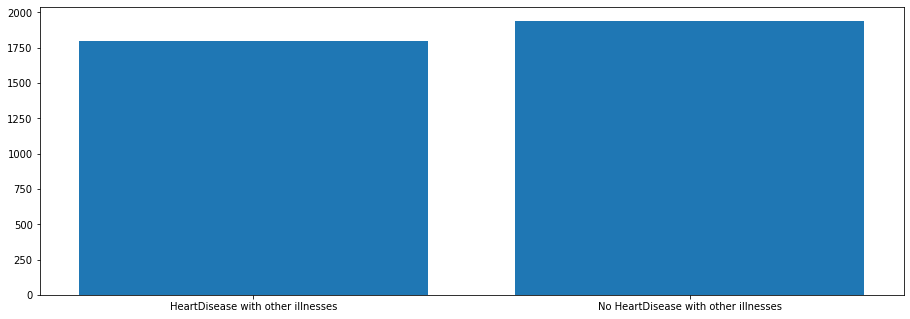

In [92]:
illWithDiseases = len(df[(df['HeartDisease'] == 1) & (df['Stroke'] == 1) & (df['Diabetic'] == 1)])
healthyWithDiseases = len(df[(df['HeartDisease'] == 0) & (df['Stroke'] == 1) & (df['Diabetic'] == 1)])

print(f"HeartDisease with other illnesses: {illWithDiseases} ")
print(f"No HeartDisease with other illnesses: {healthyWithDiseases} ")
print(f"{(illWithDiseases * 100) / (illWithDiseases + healthyWithDiseases)}% of the people that are diabetic and suffered a stroke have a heart disease.")

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
criterias = ['HeartDisease with other illnesses', 'No HeartDisease with other illnesses']
stats = [illWithDiseases, healthyWithDiseases]
ax.bar(criterias, stats)
plt.show()